## Numerical description of the double pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Define the constants
m1 = 0.5
m2 = 1.0
l1 = 2.0
l2 = 1.0
g = 1.0

# Initial conditions
phi1_0 = np.radians(50.0)
phi2_0 = np.radians(-120.0)
phiDot1_0 = 0.0
phiDot2_0 = 0.0

# Time step
dt = 0.05
numSteps = 1700

In [21]:
# Define the functions

def f1(phi1, phi2, q1, q2):
    x = (q1 - q2 * (l1 / l2) * np.cos(phi1 - phi2)) / \
        ((m1 + m2) * l1**2 - l1**2 * m2 * np.cos(phi1 - phi2)**2)
    return x

def f2(phi1, phi2, q1, q2):
    x = ((m1 + m2) * l1**2 * q2 - l1 * l2 * m2 * np.cos(phi1 - phi2) * q1) \
        / (l1**2 * l2**2 * m2 * ((m1 + m2) - m2 * np.cos(phi1 - phi2)**2))
    return x

def f3(phi1, phi2, q1, q2):
    x = -m1 * l1 * l2 * f1(phi1, phi2, q1, q2) * f2(phi1, phi2, q1, q2) * \
        np.sin(phi1 - phi2) - g * l1 * (m1 + m2) * np.sin(phi1)
    return x

def f4(phi1, phi2, q1, q2):
    x = m2 * l1 * l2 * f1(phi1, phi2, q1, q2) * f2(phi1, phi2, q1, q2) * \
        np.sin(phi1 - phi2) - m2 * g * l2 * np.sin(phi2)
    return x


In [22]:
# Runge Kutta sceme of second order

def RK2(phi1, phi2, q1, q2):
    
    k11 = f1(phi1, phi2, q1, q2)
    k21 = f1(phi1 + dt * k11, phi2 + dt * k11, q1 + dt * k11, q2 + dt * k11)
    
    k12 = f2(phi1, phi2, q1, q2)
    k22 = f2(phi1 + dt * k12, phi2 + dt * k12, q1 + dt * k12, q2 + dt * k12)
    
    k13 = f3(phi1, phi2, q1, q2)
    k23 = f3(phi1 + dt * k13, phi2 + dt * k13, q1 + dt * k13, q2 + dt * k13)
    
    k14 = f4(phi1, phi2, q1, q2)
    k24 = f4(phi1 + dt * k14, phi2 + dt * k14, q1 + dt * k14, q2 + dt * k14)
    
    phi1Next = phi1 + 0.5 * (k11 + k21) * dt
    phi2Next = phi2 + 0.5 * (k12 + k22) * dt
    q1Next = q1 + 0.5 * (k13 + k23) * dt
    q2Next = q2 + 0.5 * (k14 + k24) * dt
    
    return phi1Next, phi2Next, q1Next, q2Next



In [23]:
# Calculate the energy

def getEnergy(phi1, phi2, q1, q2):
    
    dtPhi1 = f1(phi1, phi2, q1, q2)
    dtPhi2 = f2(phi1, phi2, q1, q2)
    
    x = m1 / 2.0 * (l1 * dtPhi1)**2 + \
        m2 / 2.0 * ((l1 * dtPhi1)**2 + \
                 (l2 * dtPhi2)**2 + \
                 2*l1*l2*dtPhi1 * \
                 dtPhi2 * np.cos(phi1 - phi2)) + \
    m1 * g * l1 * (1 - np.cos(phi1)) + m2 * g * \
    (l1 * (1 - np.cos(phi1)) + l2 * (1 - np.cos(phi2)))
    
    return x

In [24]:
# Arrays to store the parameters of the different steps

Phi1 = np.zeros(numSteps)
Phi2 = np.zeros(numSteps)
Q1 = np.zeros(numSteps)
Q2 = np.zeros(numSteps)

Phi1[0] = phi1_0
Phi2[0] = phi2_0

In [25]:
# Loop for the numerical integration

energy = np.zeros(numSteps)
times = np.zeros(numSteps)

for i in range(0, numSteps-1):
    
    phi1Next, phi2Next, q1Next, q2Next = RK2(Phi1[i], Phi2[i], Q1[i], Q2[i])
    
    Phi1[i + 1] = phi1Next
    Phi2[i + 1] = phi2Next
    Q1[i + 1] = q1Next
    Q2[i + 1] = q2Next
    
    times[i] = dt * i
    energy[i] = getEnergy(Phi1[i], Phi2[i], Q1[i], Q2[i])

In [26]:
Phi1[1800:]

array([], dtype=float64)

In [27]:
def frame(phi1, phi2, phi1_arr, phi2_arr, t, num):
    #length of the pendula
    L1 = 2.
    L2 = 1.
    L = L1 + L2
    
    #create a new figure
    fig = plt.figure(figsize=[8,8], facecolor='white')
    axes = fig.gca()

    #proportional x and y axis
    axes.axis("equal")
    #no coordinate labels
    axes.set_axis_off()
    #set the plot range in x and y direction
    axes.set_ylim([-(L+0.2),(L+0.2)])
    axes.set_xlim([-(L+0.2),(L+0.2)])
    
    
    #calculate position of pendula
    pos1 = np.zeros(2)
    pos2 = np.zeros(2)
    
    pos1[0] = L1 * np.sin(phi1)
    pos1[1] = - L1 * np.cos(phi1)
    pos2[0] = pos1[0] + L2 * np.sin(phi2)
    pos2[1] = pos1[1] - L2 * np.cos(phi2)
    
    #plot the two pendula
    c0 = plt.Circle([0.,0.],.07, color='k', zorder=100)
    c1 = plt.Circle(pos1,.05, color='r', zorder=100)
    c2 = plt.Circle(pos2,.05, color='b', zorder=100)
    axes.add_artist(c0)
    axes.add_artist(c1)
    axes.add_artist(c2)
    
    #plot the two limbs
    axes.plot([0., pos1[0]], [0., pos1[1]], color='k', linewidth=2, zorder=50)
    axes.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], color='k', linewidth=2, zorder=50)
    
    #add the trajectory in the background
    N = len(phi1_arr)
    pos1_arr = np.zeros((N,2))
    pos2_arr = np.zeros((N,2))
    
    pos1_arr[:,0] = L1 * np.sin(phi1_arr)
    pos1_arr[:,1] = - L1 * np.cos(phi1_arr)
    pos2_arr[:,0] = pos1_arr[:,0] + L2 * np.sin(phi2_arr)
    pos2_arr[:,1] = pos1_arr[:,1] - L2 * np.cos(phi2_arr)
    
    axes.plot(pos1_arr[:,0], pos1_arr[:,1], color='r', linewidth = 0.5, zorder=0)
    axes.plot(pos2_arr[:,0], pos2_arr[:,1], color='b', linewidth = 0.5, zorder=0)
    
    #add a time label
    axes.text(0.7,0.85, "T = %03.2f"%t, transform = fig.transFigure, fontsize=16, horizontalalignment='left', verticalalignment='center')
        
    #save the figure
    fig.savefig("frame_%04d.png"%num, dpi=80)
    
    plt.close(fig)
    
    

    


2.571637170940382

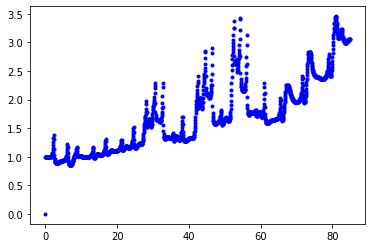

In [28]:
energy / getEnergy(phi1_0, phi2_0, 0, 0)


plt.plot(times, np.abs(energy / getEnergy(phi1_0, phi2_0, 0, 0)), ".b")
getEnergy(phi1_0, phi2_0, 0, 0)

In [86]:
#for i in np.arange(numSteps):
#    frame(Phi1[i], Phi2[i], Phi1[:i+1], Phi2[:i+1], i*0.2, i)